# Sinc Function approximation

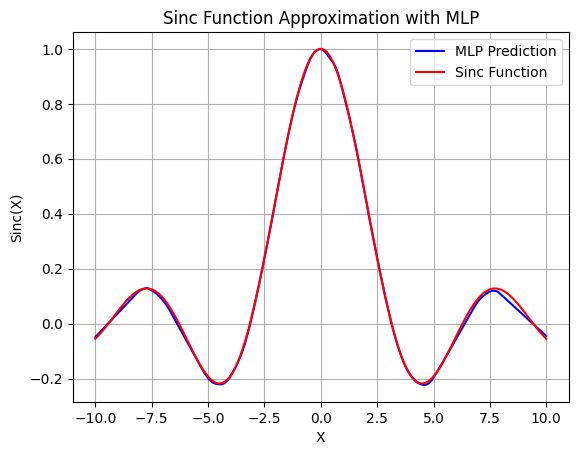

In [26]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Define the sinc function
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

# Generate training data
X_train = np.linspace(-10, 10, 1000).reshape(-1, 1)  # Input values
y_train = np.array([sinc(x[0]) for x in X_train])  # Corresponding sinc values

# Create and train the MLP model
regr = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100,100), activation='relu',
solver='adam', random_state=42, max_iter=700)
regr.fit(X_train, y_train)

# Generate test data
X_test = np.linspace(-10, 10, 200).reshape(-1, 1)  # Input values for prediction

# Predict using the trained model
y_pred = regr.predict(X_test)

# Plot the results
plt.plot(X_test, y_pred, label='MLP Prediction', color='blue')
plt.plot(X_test, [sinc(x[0]) for x in X_test], label='Sinc Function',
color='red')
plt.xlabel('X')
plt.ylabel('Sinc(X)')
plt.title('Sinc Function Approximation with MLP')
plt.legend()
plt.grid(True)
plt.show()



In [20]:
regr

MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100),
             max_iter=700, random_state=42)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse_mlp = mean_squared_error(y_pred, [sinc(x[0]) for x in X_test])
r2_mlp = r2_score(y_pred, [sinc(x[0]) for x in X_test])

print(f"MLPRegressor - MSE: {mse_mlp}, R-squared: {r2_mlp}")

MLPRegressor - MSE: 6.454677549005657e-05, R-squared: 0.9994820345580055


# ANN code using Tensor Flow

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


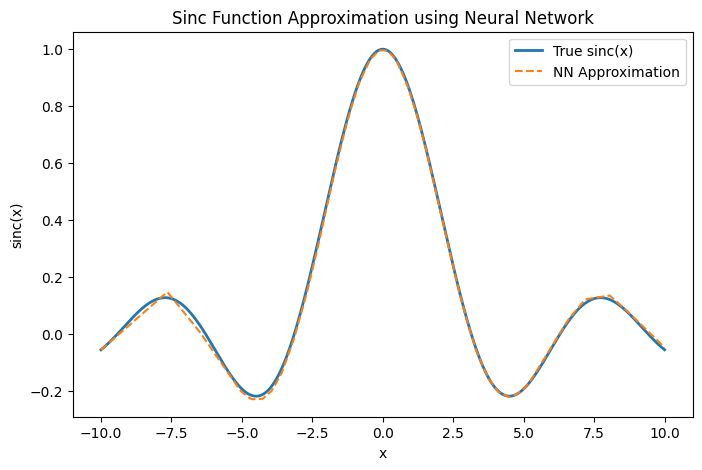

In [21]:
# Define the sinc function
def sinc_function(x):
    return np.sinc(x / np.pi)

# Generate training data
x_train = np.linspace(-10, 10, 1000)
y_train = sinc_function(x_train)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)

# Generate test data
x_test = np.linspace(-10, 10, 500)
y_test = sinc_function(x_test)
y_pred1 = model.predict(x_test)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_test, label='True sinc(x)', linewidth=2)
plt.plot(x_test, y_pred1, label='NN Approximation', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('sinc(x)')
plt.title('Sinc Function Approximation using Neural Network')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have x_test, y_test, and pred1 from your TensorFlow ANN code
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.0001019941255569301
Root Mean Squared Error (RMSE): 0.010099214105905968
Mean Absolute Error (MAE): 0.008093177853959127
R-squared (R2): 0.9991788703416098


# SVR code using Scikit Learn

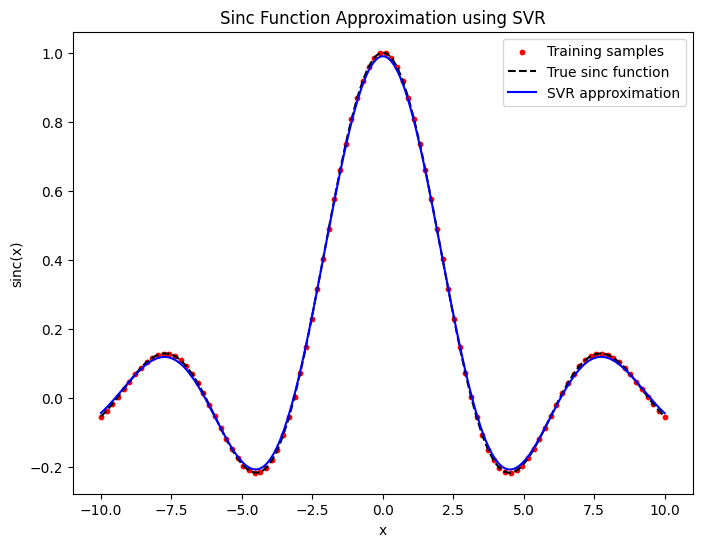

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# Define sinc function
def sinc(x):
    return np.sinc(x / np.pi)

# Generate training data
np.random.seed(0)
X_train = np.linspace(-10, 10, 100).reshape(-1, 1)
y_train = sinc(X_train).ravel()

# Train SVR model
svr = SVR(kernel='rbf', C=10, epsilon=0.01, gamma=0.1)
svr.fit(X_train, y_train)

# Generate test data
X_test = np.linspace(-10, 10, 500).reshape(-1, 1)
y_test = sinc(X_test).ravel()
y_pred2 = svr.predict(X_test)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='red', label='Training samples',s=10)
plt.plot(X_test, y_test, label='True sinc function',
linestyle='dashed', color='black')
plt.plot(X_test, y_pred2, label='SVR approximation', color='blue')
plt.legend()
plt.xlabel("x")
plt.ylabel("sinc(x)")
plt.title("Sinc Function Approximation using SVR")
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming you have X_test, y_test, and y_pred2 from your SVR code
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 5.3264562115080276e-05
Root Mean Squared Error (RMSE): 0.007298257471142018
Mean Absolute Error (MAE): 0.006562544021344925
R-squared (R2): 0.9995711800904705
